In [1]:
import os
import math
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Proper handling of all the stock data downloaded.

folders = ["STOCKS_NSE_AUTO","STOCKS_NSE_BANK","STOCKS_NSE_FMCG","STOCKS_NSE_IT","STOCKS_NSE_METAL","STOCKS_NSE_PHARMA"]

for folder_path in folders:
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    for f in csv_files:
        file_path = os.path.join(folder_path, f)
        df = pd.read_csv(file_path)
        df.ffill(inplace=True)
        df.rename(columns={'Price': 'Date'}, inplace=True)
        df.to_csv(file_path, index=False)

print("Handled Missing Values and Proper Identation Applied.")

Handled Missing Values and Proper Identation Applied.


Computation of Logarithmic Returns of Stock Prices (Close).


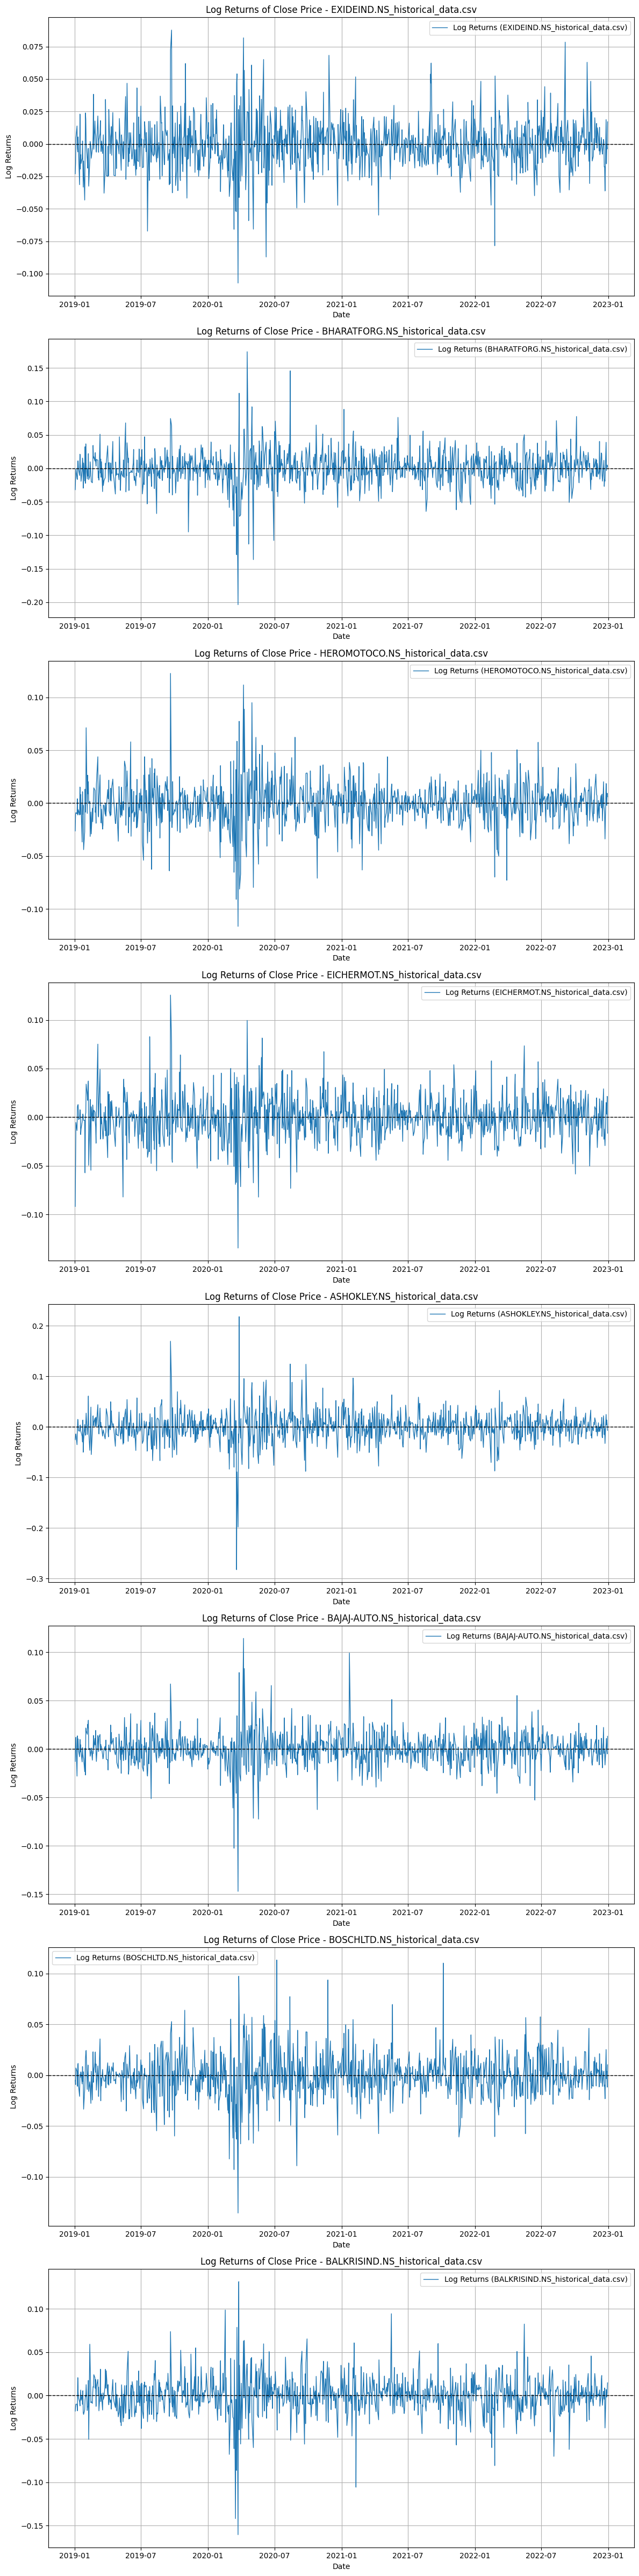

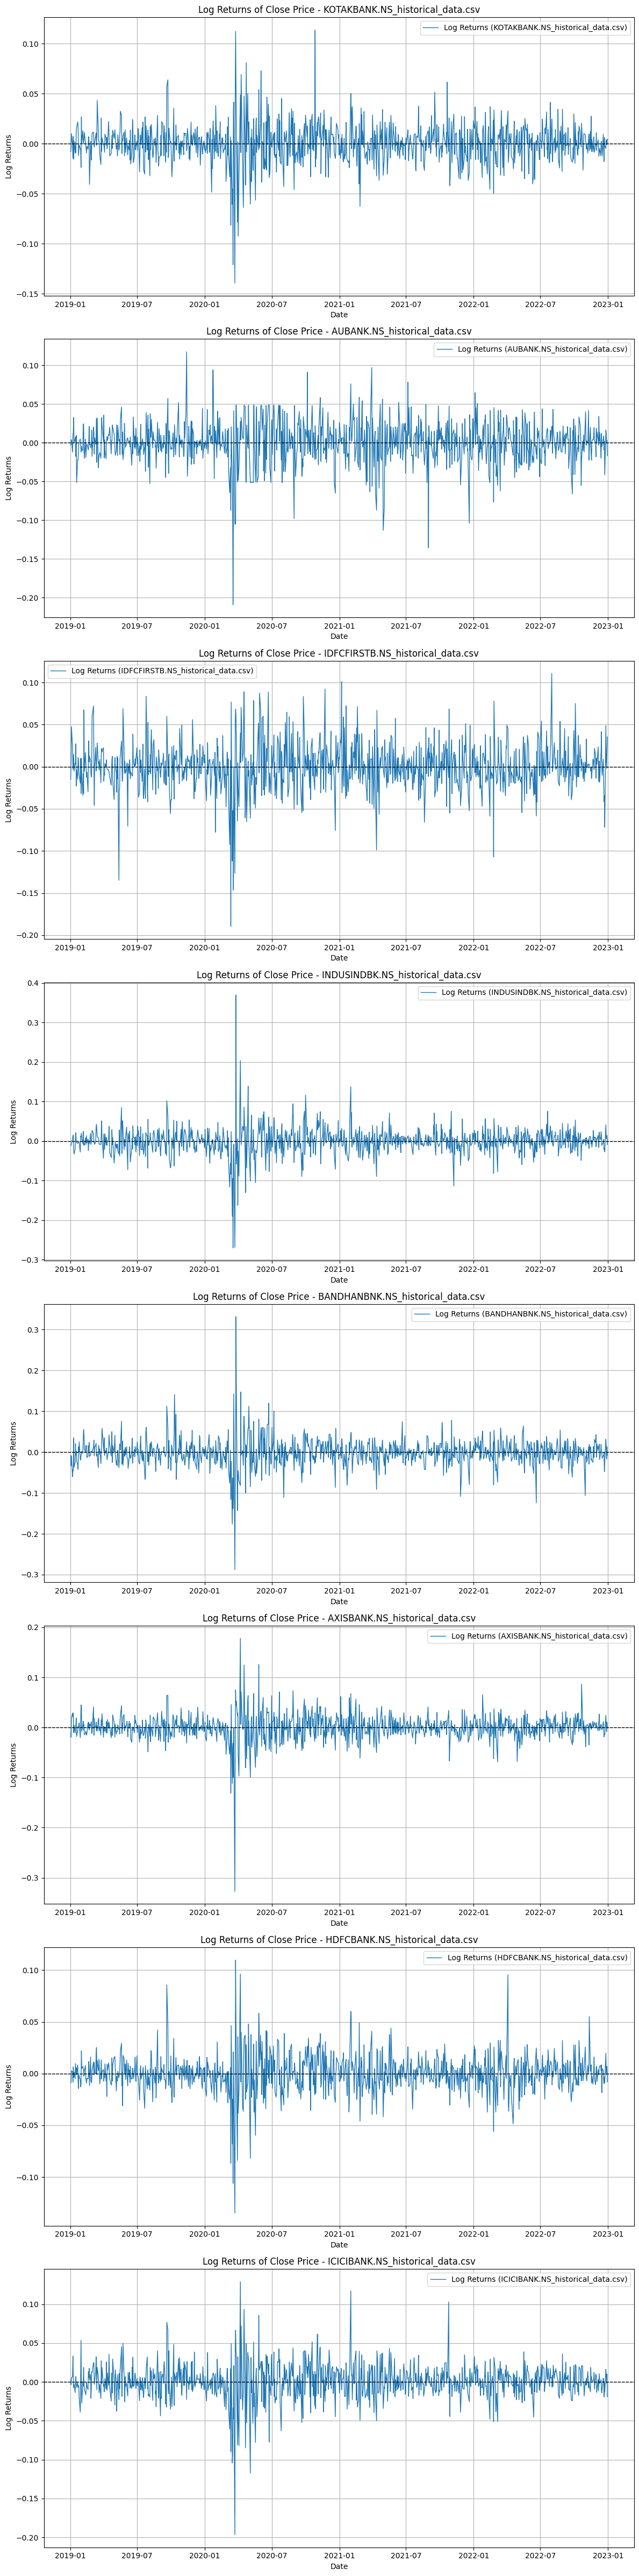

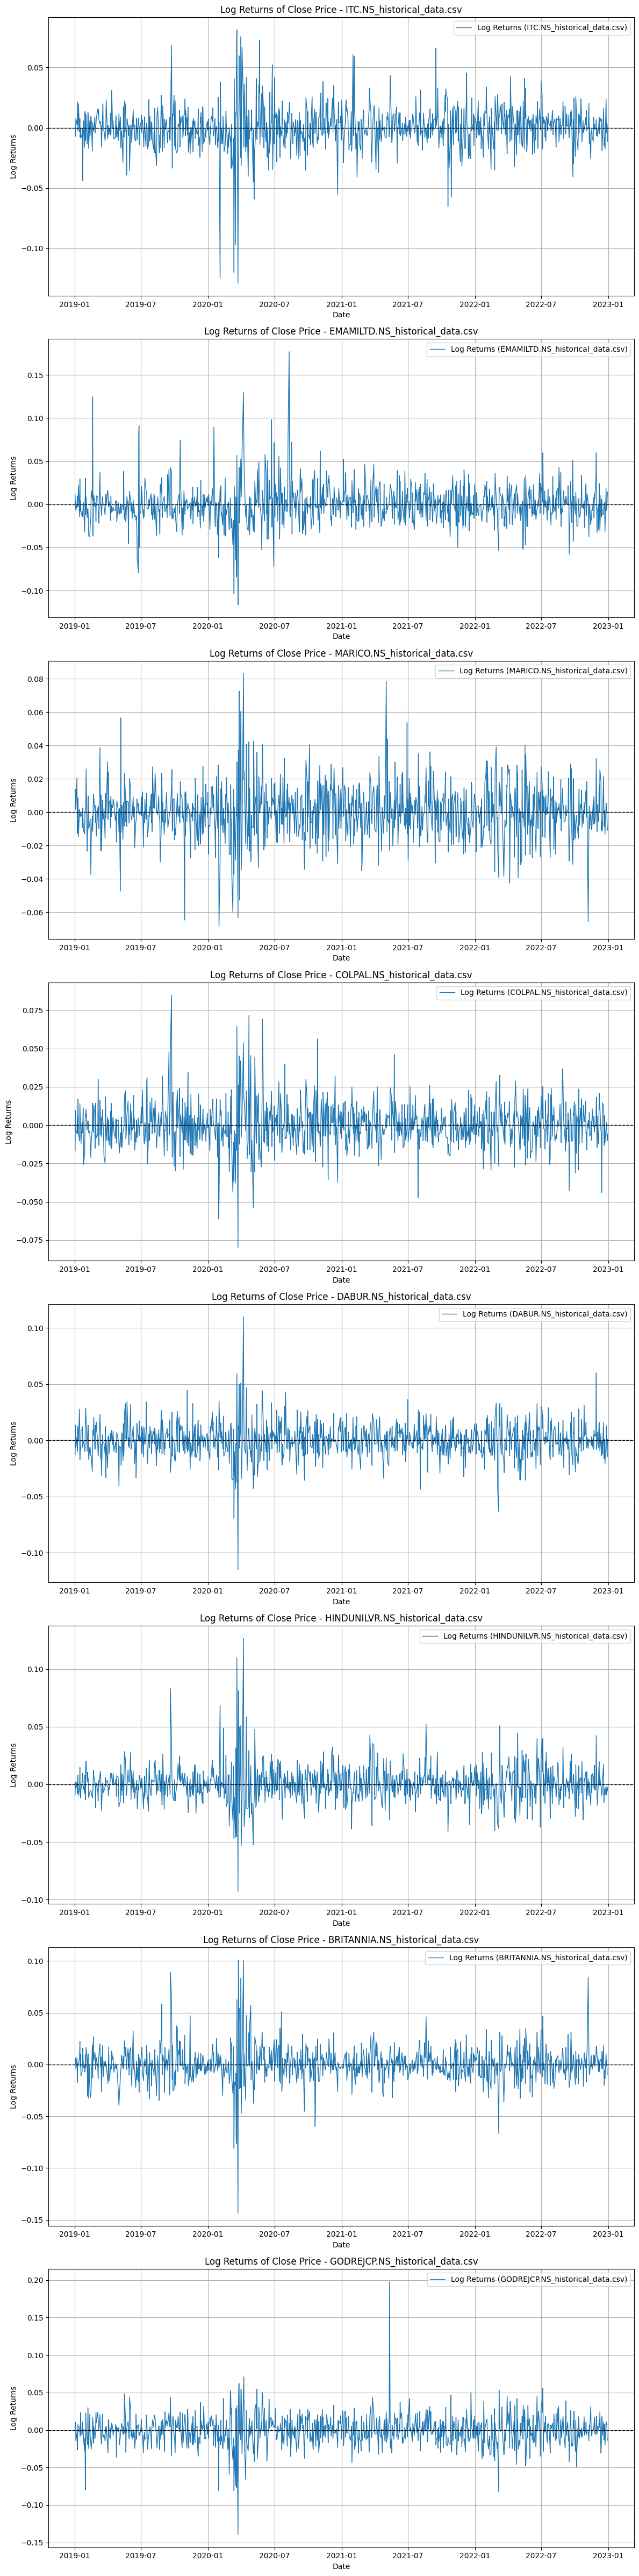

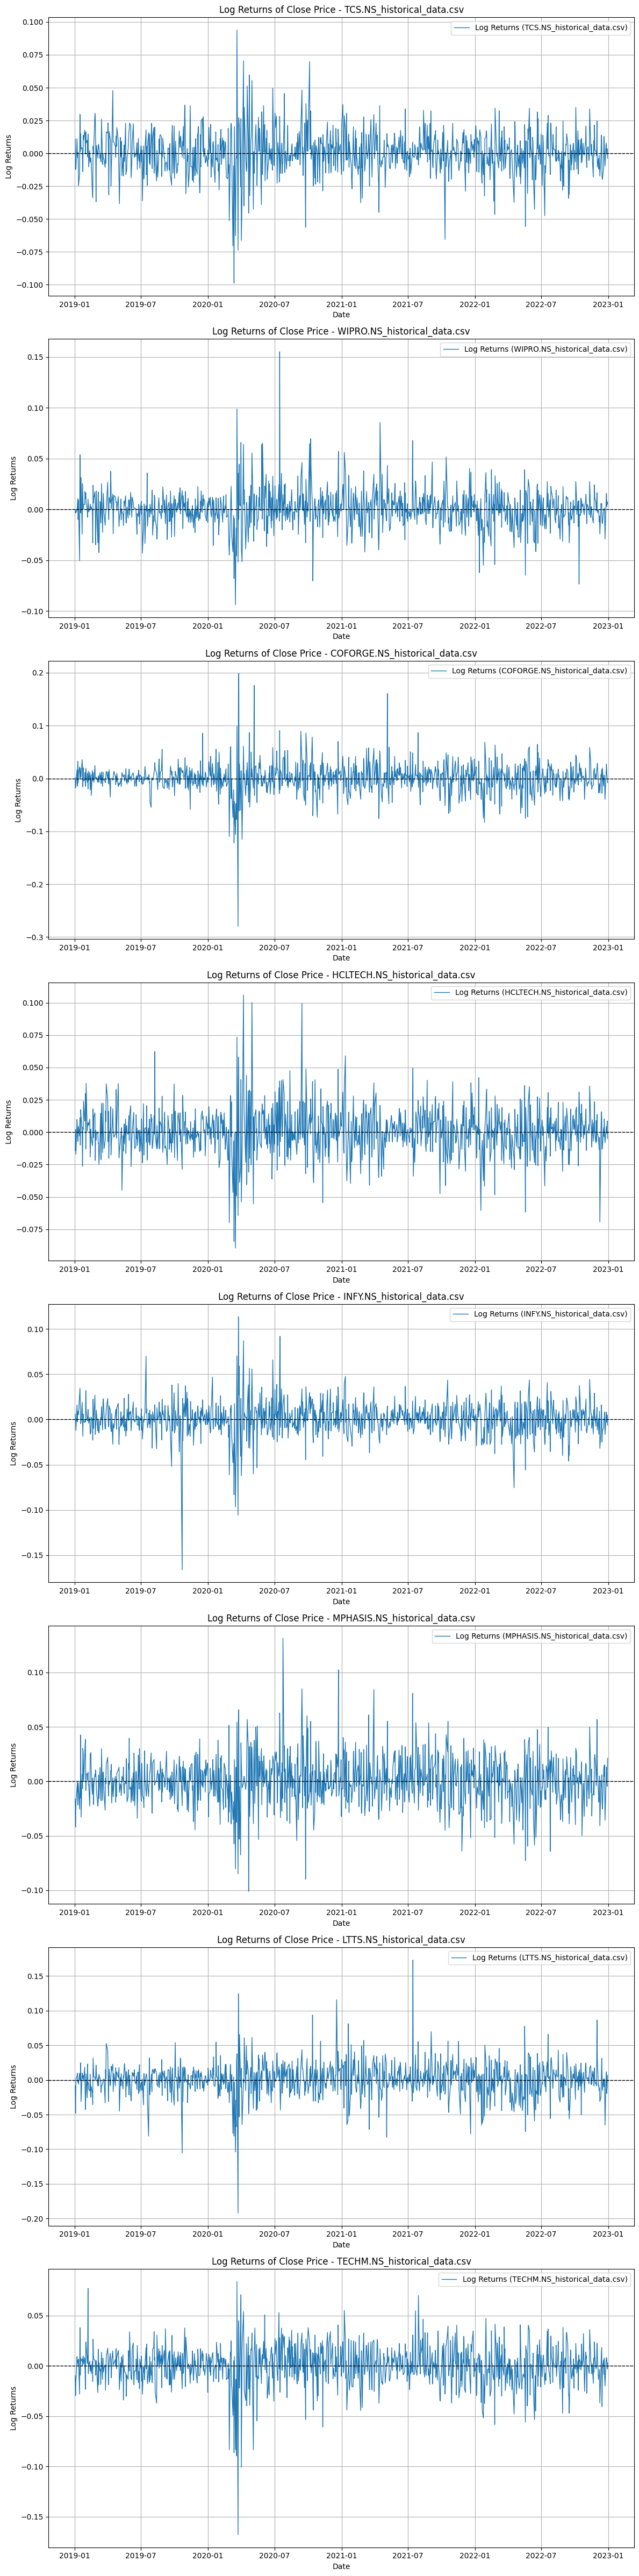

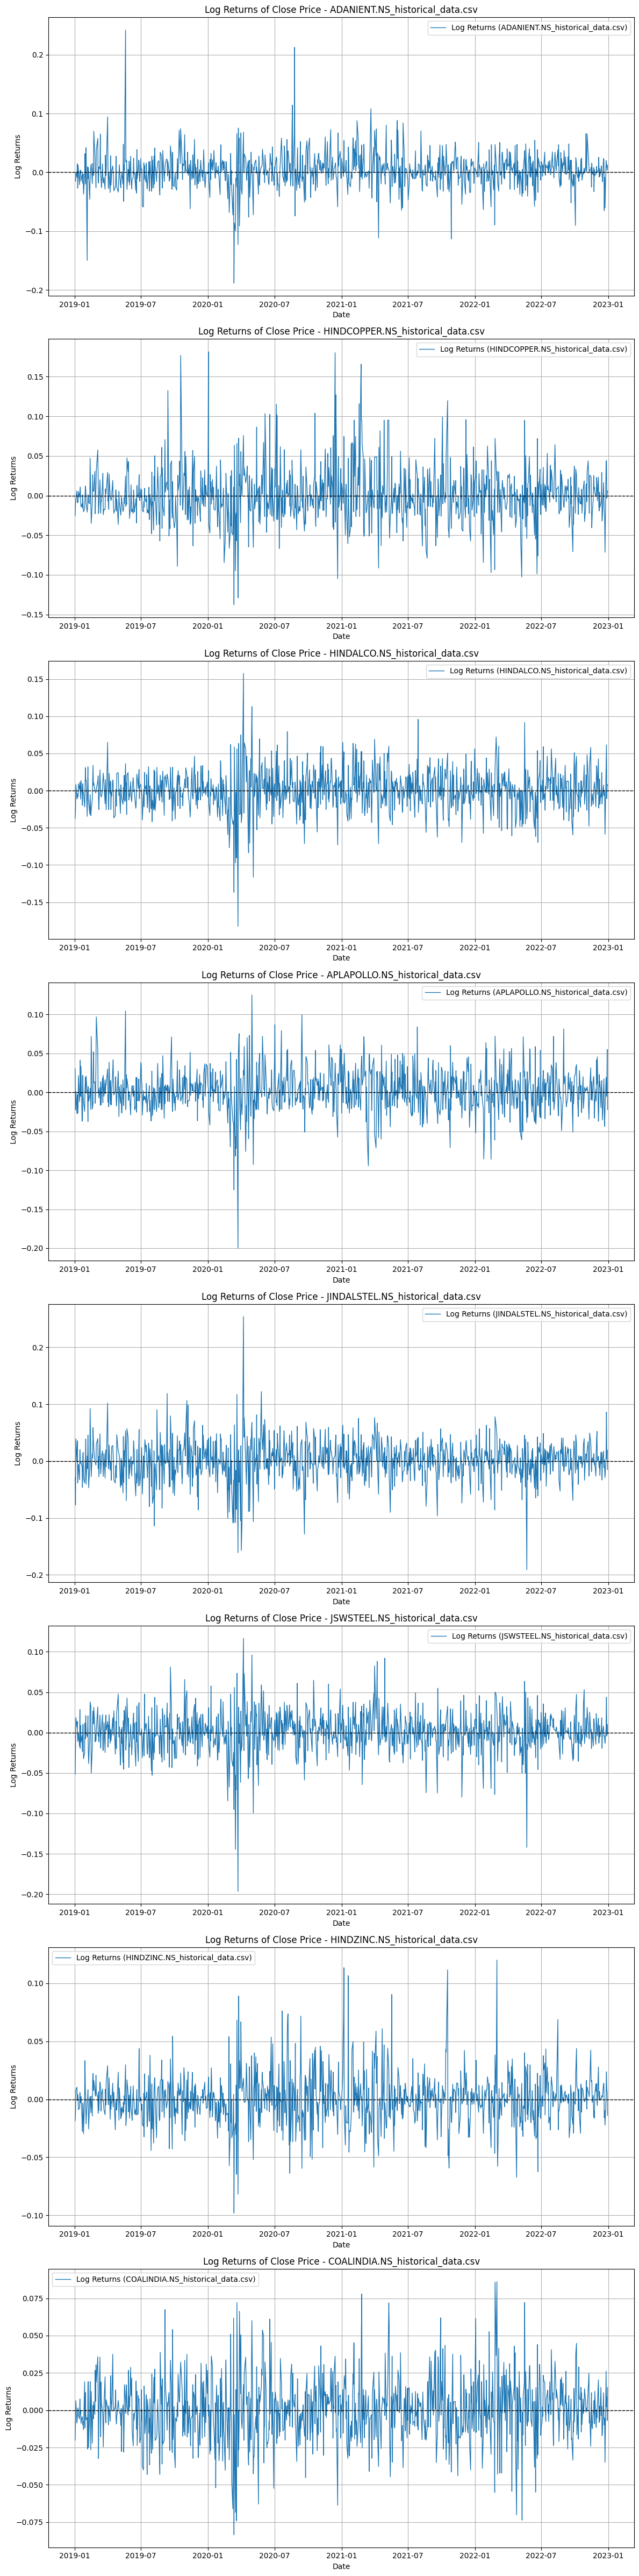

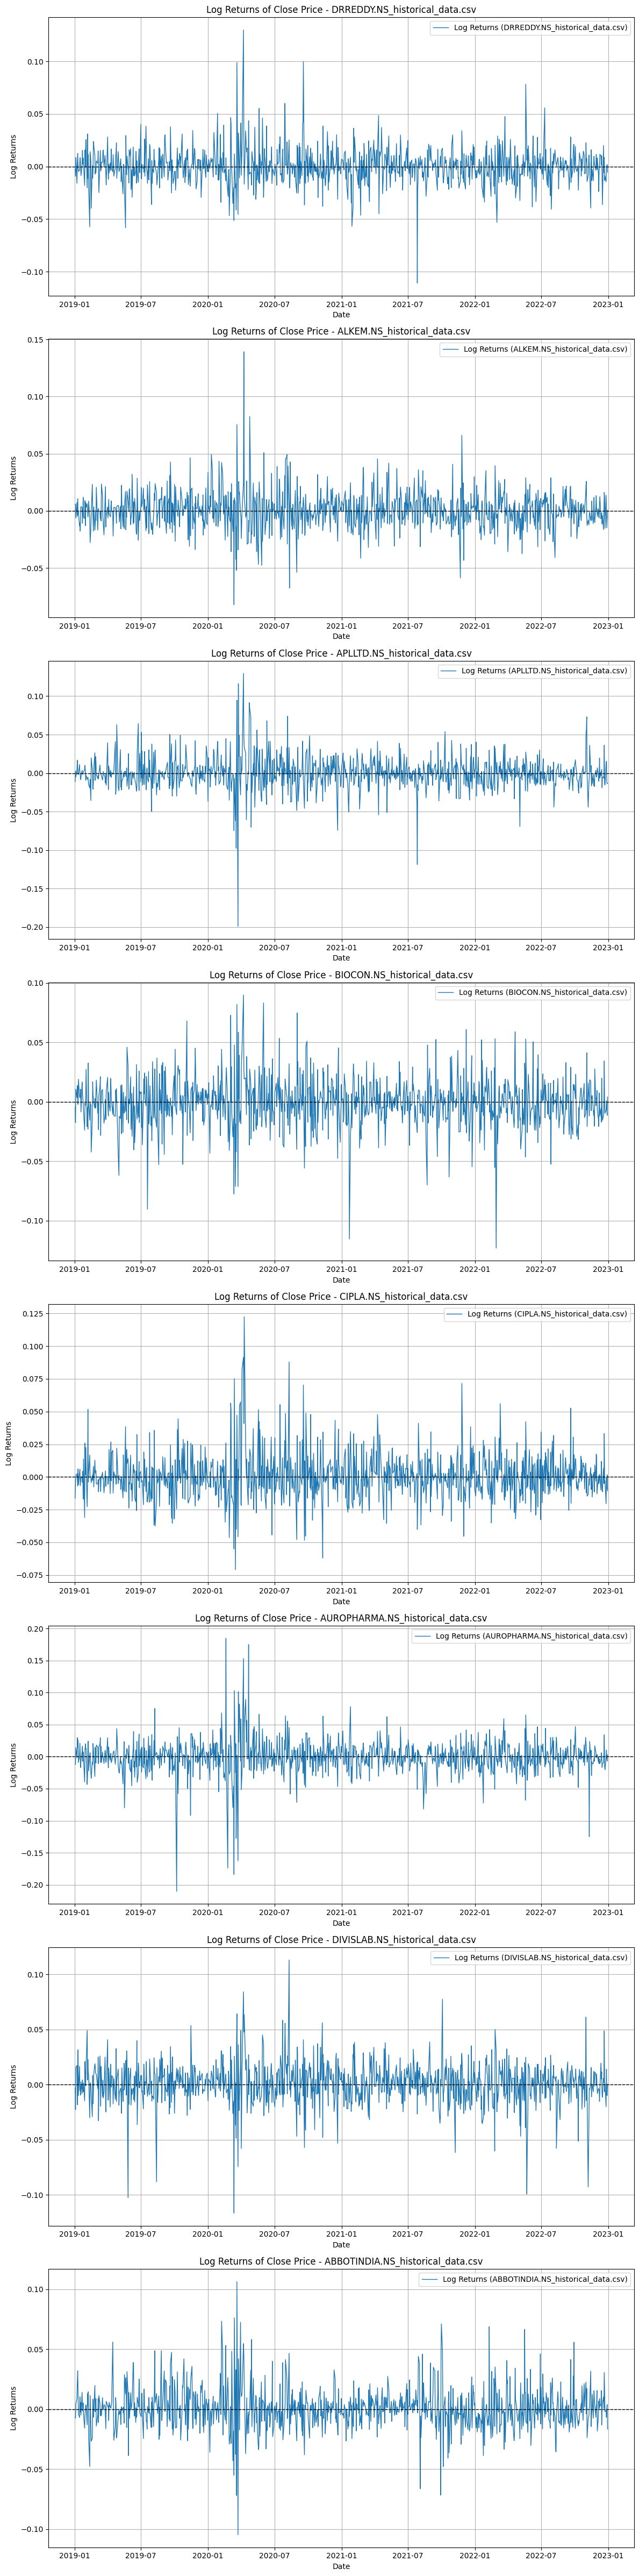

In [3]:
print("Computation of Logarithmic Returns of Stock Prices (Close).")

for folder_path in folders:
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    fig, axes = plt.subplots(len(csv_files), 1, figsize=(12, len(csv_files) * 6))

    for i, file in enumerate(csv_files):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        # Convert columns to appropriate types
        df['Date'] = pd.to_datetime(df['Date'])

        # Calculate log returns
        df.set_index('Date', inplace=True)
        df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))

        # Plot log returns
        axes[i].plot(df.index, df['Returns'], label=f'Log Returns ({file})', linewidth=1)
        axes[i].axhline(y=0, color='black', linestyle='--', linewidth=1)
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Log Returns')
        axes[i].set_title(f'Log Returns of Close Price - {file}')
        axes[i].grid(True)
        axes[i].legend()

        # Save cleaned and processed data
        df.reset_index(inplace=True)
        df.to_csv(file_path, index=False)

    plt.tight_layout()
    plt.show()